In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [5]:
dir0='C-NMC_Leukemia/training_data/fold_0'
dir1='C-NMC_Leukemia/training_data/fold_1'
dir2='C-NMC_Leukemia/training_data/fold_2'
dir3='C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data'

CATEGORIES=['hem','all']

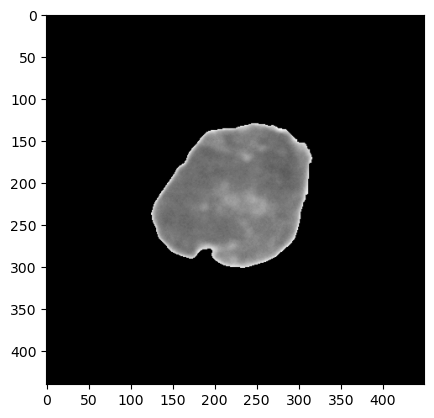

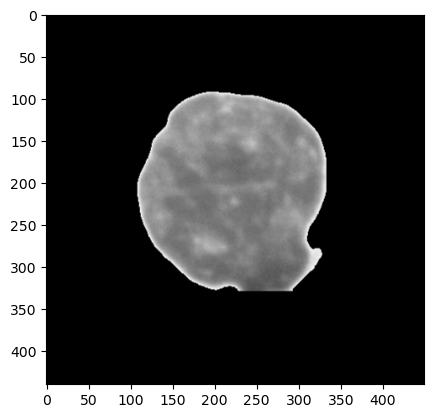

In [6]:
for category in CATEGORIES:  
    path = os.path.join(dir0,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array[10:], cmap='gray')  
        plt.show()   
        break

In [7]:
size = []
for category in CATEGORIES:  
    path = os.path.join(dir0,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        size.append(img_array.shape)
pd.Series(size).value_counts()

(450, 450)    3527
dtype: int64

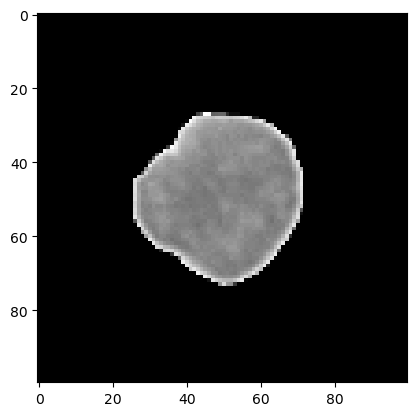

In [8]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
def get(dir,training_data):
    for image in CATEGORIES:
        path=os.path.join(dir,image)
        class_num=CATEGORIES.index(image)
        for img in os.listdir(path):
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array,class_num])
            
def divide(training_data):
    for features,label in training_data:
        X.append(features)
        y.append(label)
import random
def shuffle(training_data):
    random.shuffle(training_data)

In [10]:
train0=[]
get(dir0,train0)
shuffle(train0)

In [11]:
train1=[]
get(dir1,train1)
shuffle(train1)

In [12]:
train2=[]
get(dir2,train2)
shuffle(train2)

In [13]:
print("The size of The 3 datasets are ")
print(len(train0))
print(len(train1))
print(len(train2))

The size of The 3 datasets are 
3527
3581
3553


In [14]:
X=[]
y=[]


divide(train0)
divide(train1)
divide(train2)

In [15]:
X=np.asarray(X)
y=np.asarray(y)

In [16]:
np.shape(X)

(10661, 100, 100)

In [17]:
X=X.reshape(10661, IMG_SIZE, IMG_SIZE,1)

In [18]:
import tensorflow as tf

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Conv2D(128, (5, 5), activation='relu', input_shape=X.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))

model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))   
     

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
model.fit(X,y,epochs=2)


Epoch 1/2


2023-04-10 01:18:35.014057: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


334/334 [==============================] - 1583s 5s/step - loss: 0.6726 - accuracy: 0.6782
Epoch 2/2
334/334 [==============================] - 1818s 5s/step - loss: 0.6283 - accuracy: 0.6821


In [22]:
y_test=pd.read_csv("C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv")


In [23]:
y_test=y_test['labels']


In [24]:
x_test=[]
for img in os.listdir(dir3):
            img_arr=cv2.imread(os.path.join(dir3,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            x_test.append(new_array)
            

In [25]:
x_test=np.asarray(x_test)


In [26]:
np.shape(x_test)
x_test=x_test.reshape(1867, IMG_SIZE, IMG_SIZE,1)
model.evaluate(x_test,y_test)


59/59 [==============================] - 77s 1s/step - loss: 0.6487 - accuracy: 0.6529


[0.6487469673156738, 0.6529191136360168]